<h1><center><font color = 'purple'> Twitter Semantic Analysis



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter
import emoji
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("tweet.csv")
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [7]:
df.duplicated().sum()

49

In [8]:
df[df.duplicated()]

,tweets,class
12617,#Irony,figurative
17820,#irony,figurative
21104,#sarcasm,figurative
31250,#ironic,irony
35871,#Irony,irony
36717,#irony,irony
39333,#Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...,irony
39335,mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...,irony
39350,#Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...,irony
39355,mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...,irony


In [3]:
df = df.drop_duplicates()

In [4]:
df.duplicated().sum()

0

### 1. Basic Statistics:

Calculate basic statistics like the number of tweets & average tweet length.

#### i) Length of tweets

In [19]:
df['tweet_length'] = df['tweets'].apply(len)
df

,tweets,class,tweet_length
0,Be aware dirty step to get money #staylight ...,figurative,108
1,#sarcasm for #people who don't understand #diy...,figurative,80
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132
3,@wilw Why do I get the feeling you like games?...,figurative,55
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,111
81404,I never knew..I better put this out to the Uni...,sarcasm,137
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,128
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,137


#### 2) Average length of tweets

In [17]:
df['tweet_length'].mean()

102.45301687582197

### 2. Hashtag Analysis:

In this,we analyze the usage of hashtags in tweets, identify popular hashtags and their frequency.


In [33]:
def lower(tweet):
    a = tweet.lower()
    return a

In [34]:
hashtag_pattern = r'#\w+'

# Extract hashtags from tweets and store them in a list
hashtags = []
for tweet in df['tweets'].apply(lower):
    hashtags.extend(re.findall(hashtag_pattern, tweet))

# Create a DataFrame with hashtag frequencies
hashtag_freq = pd.DataFrame(Counter(hashtags).items(), columns=['Hashtag', 'Frequency'])

# Sort the DataFrame by frequency to identify popular hashtags
popular_hashtags = hashtag_freq.sort_values(by='Frequency', ascending=False)

# Display the top N most popular hashtags (adjust N as needed)
top_n = 10
print(f'Top {top_n} Popular Hashtags:')
print(popular_hashtags.head(top_n))

Top 10 Popular Hashtags:
         Hashtag  Frequency
4       #sarcasm      29733
13        #irony      23704
332      #ironic       7868
1702       #news       2770
68        #humor       2757
1505      #peace       2705
646   #education       2640
960    #politics       2541
3357       #late       2539
7362      #drugs       2425


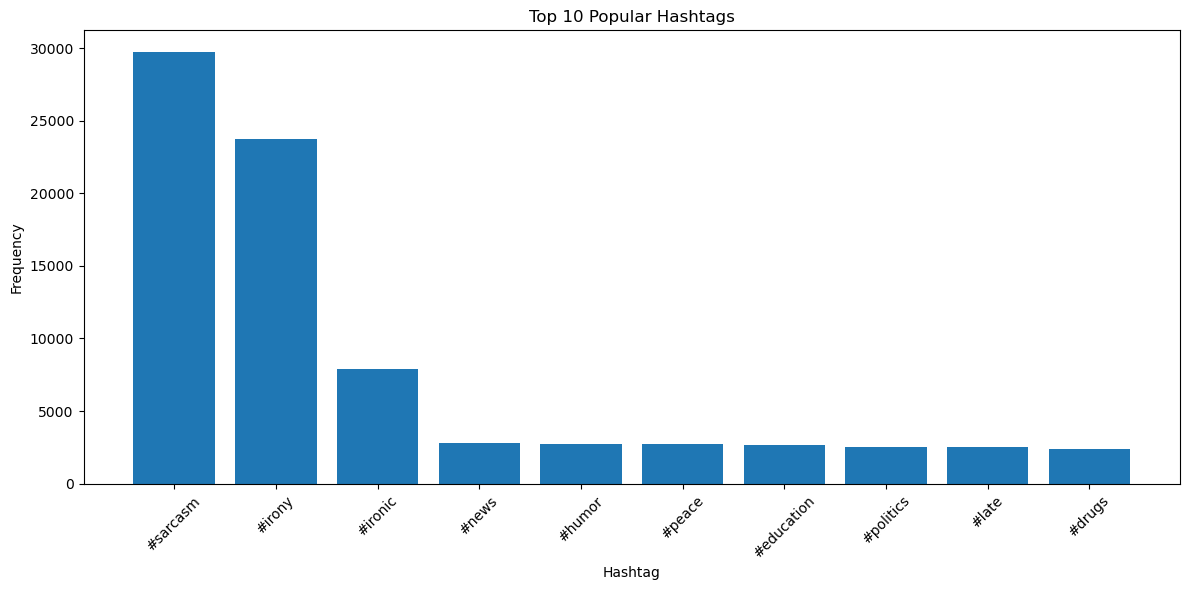

In [43]:
top_10_hashtags = popular_hashtags.head(10)

# Plot the top 10 hashtags in a histogram
plt.figure(figsize=(12, 6))
plt.bar(top_10_hashtags['Hashtag'], top_10_hashtags['Frequency'])
plt.title('Top 10 Popular Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Mentions Analysis:

Analyze mentions (usernames) in tweets.
Identify the most mentioned users or accounts.

In [44]:
mention_pattern = r'@[\w_]+'

# Extract mentions from tweets and store them in a list
mentions = []
for tweet in df['tweets']:
    mentions.extend(re.findall(mention_pattern, tweet))

# Create a DataFrame with mention frequencies
mention_freq = pd.DataFrame(Counter(mentions).items(), columns=['Mention', 'Frequency'])

# Sort the DataFrame by frequency to identify the most mentioned users
most_mentioned_users = mention_freq.sort_values(by='Frequency', ascending=False)

# Display the top N most mentioned users (adjust N as needed)
top_n = 10
print(f'Top {top_n} Most Mentioned Users:')
print(most_mentioned_users.head(top_n))


Top 10 Most Mentioned Users:
                Mention  Frequency
68     @realDonaldTrump        305
364                @CNN        159
91             @FoxNews        139
1372    @HillaryClinton         92
710              @POTUS         83
340            @YouTube         73
2609               @GOP         70
7375      @CarlyFiorina         69
244             @Alanis         66
15104       @LTCartoons         63


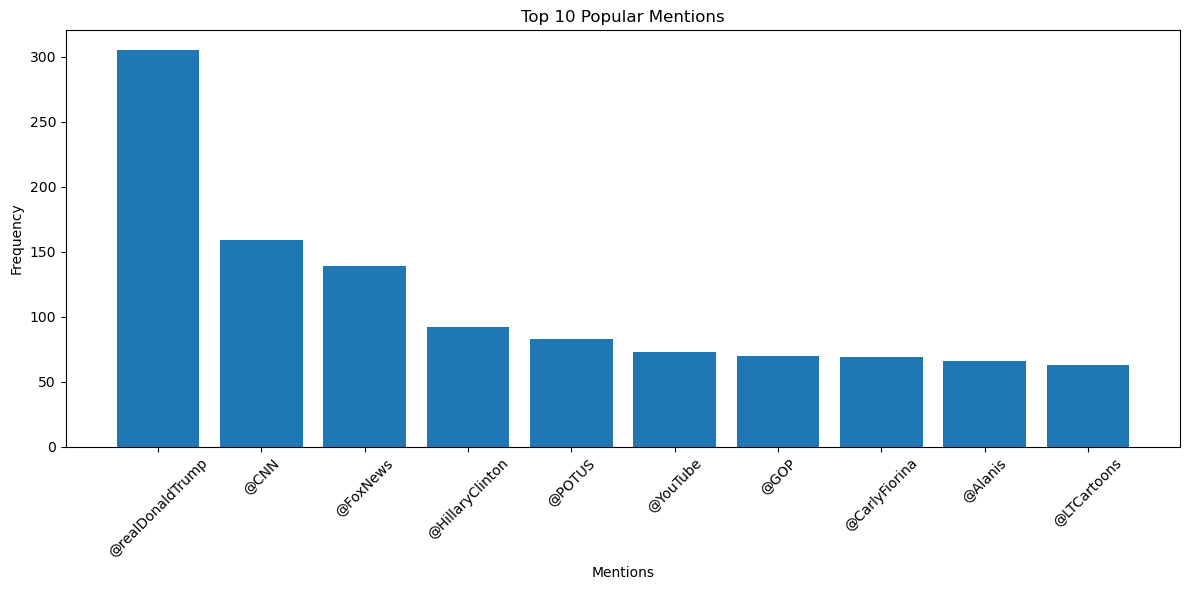

In [88]:
Top_10_mentions = most_mentioned_users.head(10)

plt.figure(figsize=(12, 6))
plt.bar(Top_10_mentions['Mention'], Top_10_mentions['Frequency'])
plt.title('Top 10 Popular Mentions')
plt.xlabel('Mentions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Emoji Analysis:

Analyze the usage of emojis and emoticons in tweets.
Identify commonly used emojis and their associated sentiments or meanings.

In [61]:
# Define a regular expression pattern to match emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F700-\U0001F77F"  # Alphabetic Presentation Forms
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Arrows
                           u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)

# Function to extract emojis from a tweet
def extract_emojis(text):
    return ''.join(emoji_pattern.findall(text))

# Apply the extraction function to the 'tweet' column
df['emojis'] = df['tweets'].apply(extract_emojis)


In [68]:
from collections import Counter

# Flatten the list of emojis in the DataFrame
all_emojis = [emoji for sublist in df['emojis'] for emoji in sublist]

# Calculate emoji frequencies
emoji_frequencies = Counter(all_emojis)

# Identify the top N most common emojis (adjust N as needed)
top_n = 10
most_common_emojis = emoji_frequencies.most_common(top_n)

# Display the most common emojis and their frequencies
for emoji, frequency in most_common_emojis:
    print(f"Emoji: {emoji}, Frequency: {frequency}")

Emoji: 😂, Frequency: 2513
Emoji: 😊, Frequency: 663
Emoji: 😒, Frequency: 413
Emoji: 🏼, Frequency: 265
Emoji: 👍, Frequency: 235
Emoji: 😁, Frequency: 216
Emoji: 🏻, Frequency: 207
Emoji: 😑, Frequency: 191
Emoji: 😅, Frequency: 186
Emoji: 😭, Frequency: 177


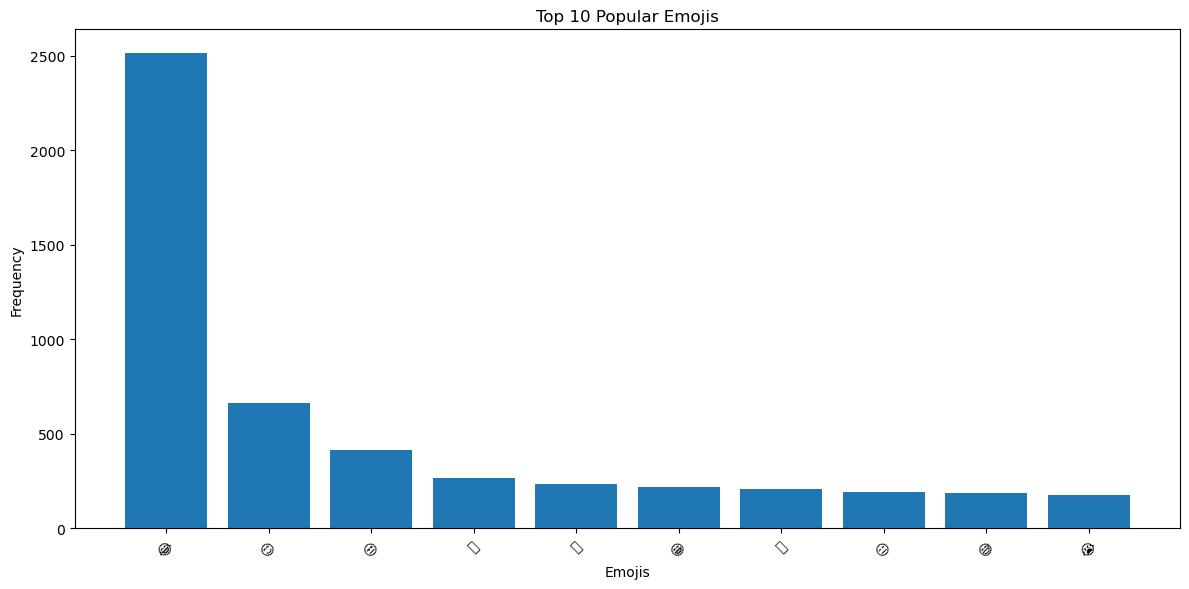

In [90]:
Top_10_mentions = most_mentioned_users.head(10)

plt.figure(figsize=(12, 6))
plt.bar(emoji_df[0], emoji_df[1])
plt.title('Top 10 Popular Emojis')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Language Analysis:

Determine the languages used in the tweets and analyze language distribution.

In [ ]:
from langdetect import detect
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'tweet' column
# Create a function to detect language with error handling
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'  # You can use any default value you prefer

# Apply the language detection function to the 'tweet' column
df['tweet_language'] = df['tweets'].apply(lambda x: detect_language(x) if not pd.isnull(x) else 'unknown')

In [104]:
lang_df = pd.DataFrame(df['tweet_language'].value_counts().head(10).reset_index())
lang_df.columns = ['language','count']
lang_df

,language,count
0,en,79546
1,ca,181
2,af,160
3,it,136
4,fr,128
5,es,123
6,da,101
7,tl,101
8,de,100
9,id,99


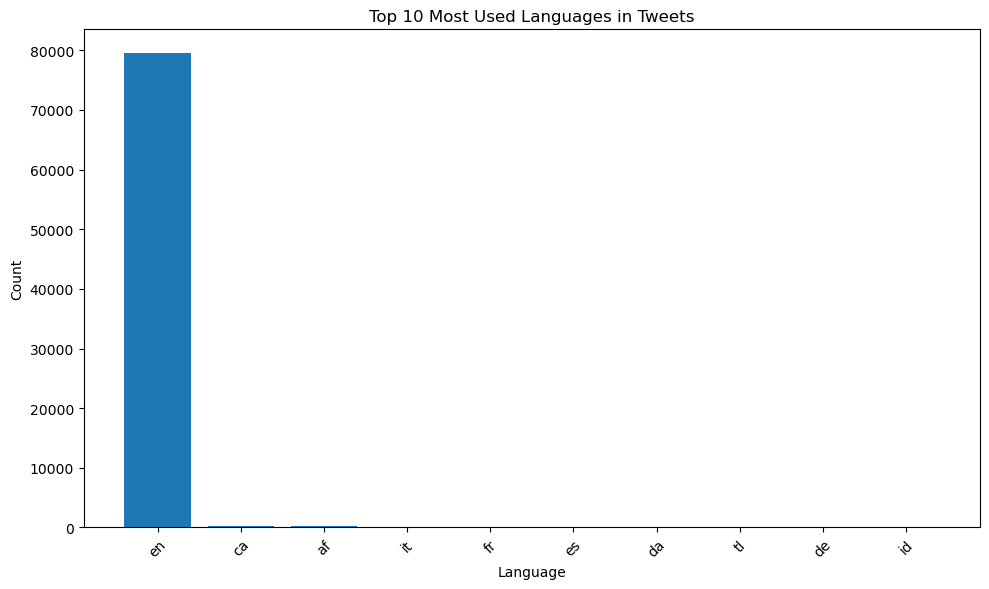

In [106]:
# Create a bar plot for the top 10 most used languages
plt.figure(figsize=(10, 6))
plt.bar(lang_df['language'], lang_df['count'])
plt.title('Top 10 Most Used Languages in Tweets')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Cleaning Tweets

In [5]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)   # Remove Special Characters and Punctuation
    text = text.lower()                          # Lowercasing
    text = re.sub(r'@\w+|#\w+', '', text)        # Remove Mentions and Hashtags
    text = re.sub(r'\d+', '', text)              # Remove Numbers
    text = ' '.join(text.split())                # Remove Extra Whitespace
    text = re.sub(r'RT[\s]+','',text)            # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text)     # Remove hyperlinks
    return text

In [6]:
df['clean_tweets'] = df['tweets'].apply(clean_text)
df

,tweets,class,clean_tweets
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money staylight sta...
1,#sarcasm for #people who don't understand #diy...,figurative,sarcasm for people who dont understand diy art...
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,iminworkjeremy medsingle dailymail readers bei...
3,@wilw Why do I get the feeling you like games?...,figurative,wilw why do i get the feeling you like games s...
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,teacherarthurg rweingarten you probably just m...
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,photo image via we heart it httptcokynfzoi chi...
81404,I never knew..I better put this out to the Uni...,sarcasm,i never knewi better put this out to the unive...
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,hey just wanted to say thanks puberty for lett...
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,im sure coverage like the fox news special the...


### 7. Word Frequency Analysis:

Analyze word associations and co-occurrences to identify common phrases or terms frequently mentioned together in tweets.

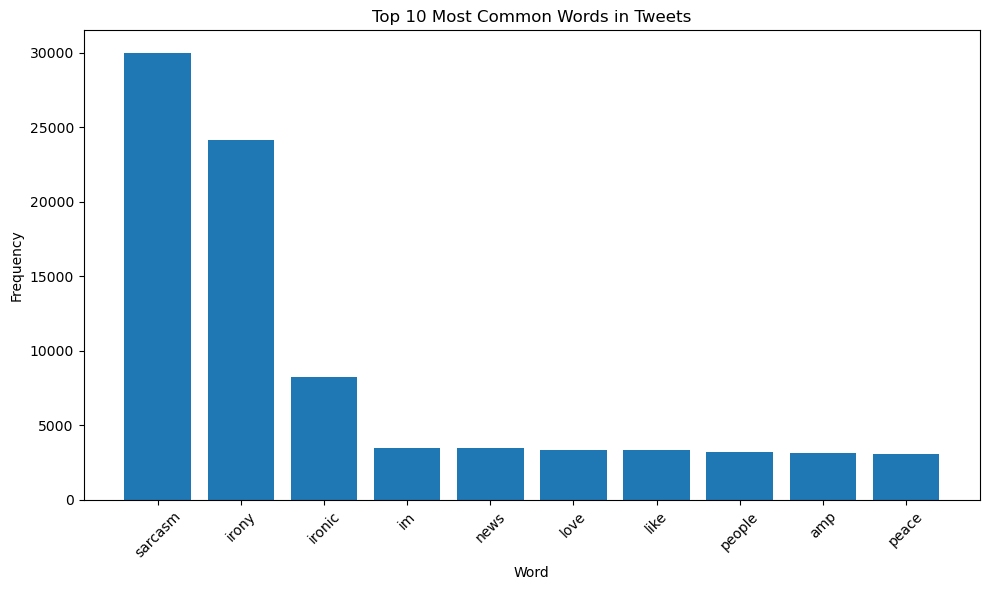

In [134]:
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for tweet in df['clean_tweets'] if pd.notnull(tweet) for word in tweet.split() if word.lower() not in stop_words]

# Calculate word frequencies
word_freq = Counter(words)

# Get the top N most common words (adjust N as needed)
top_n = 10
most_common_words = word_freq.most_common(top_n)

# Extract words and frequencies
top_words, frequencies = zip(*most_common_words)

# Create a bar plot for the top N most common words
plt.figure(figsize=(10, 6))
plt.bar(top_words, frequencies)
plt.title(f'Top {top_n} Most Common Words in Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### i) Applying Tokenization

In [125]:
def tokenize_text(text):
    return word_tokenize(text)

In [129]:
df['tokens'] = df['clean_tweets'].apply(tokenize_text)

#### ii) Removing Stopwords

In [7]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

In [131]:
df['tokens'] = df['tokens'].apply(remove_stopwords)

In [132]:
df

,tweets,class,tweet_length,emojis,tweet_language,clean_tweets,tokens
0,Be aware dirty step to get money #staylight ...,figurative,108,,en,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st..."
1,#sarcasm for #people who don't understand #diy...,figurative,80,,en,sarcasm for people who dont understand diy art...,"[sarcasm, people, dont, understand, diy, artat..."
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,,en,iminworkjeremy medsingle dailymail readers bei...,"[iminworkjeremy, medsingle, dailymail, readers..."
3,@wilw Why do I get the feeling you like games?...,figurative,55,,en,wilw why do i get the feeling you like games s...,"[wilw, get, feeling, like, games, sarcasm]"
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,,en,teacherarthurg rweingarten you probably just m...,"[teacherarthurg, rweingarten, probably, missed..."
...,...,...,...,...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,111,,en,photo image via we heart it httptcokynfzoi chi...,"[photo, image, via, heart, httptcokynfzoi, chi..."
81404,I never knew..I better put this out to the Uni...,sarcasm,137,,en,i never knewi better put this out to the unive...,"[never, knewi, better, put, universe, lolmaybe..."
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,128,,en,hey just wanted to say thanks puberty for lett...,"[hey, wanted, say, thanks, puberty, letting, a..."
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,137,,en,im sure coverage like the fox news special the...,"[im, sure, coverage, like, fox, news, special,..."


In [138]:
tokens = df['clean_tweets'].apply(tokenize_text)

In [139]:
tokens = tokens.apply(remove_stopwords)

#### iii) Applying Lemmatization

In [140]:
lemmatizer = WordNetLemmatizer()

In [141]:
lemmatized_tweets = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in tokens]

### 8. Word Cloud Analysis:

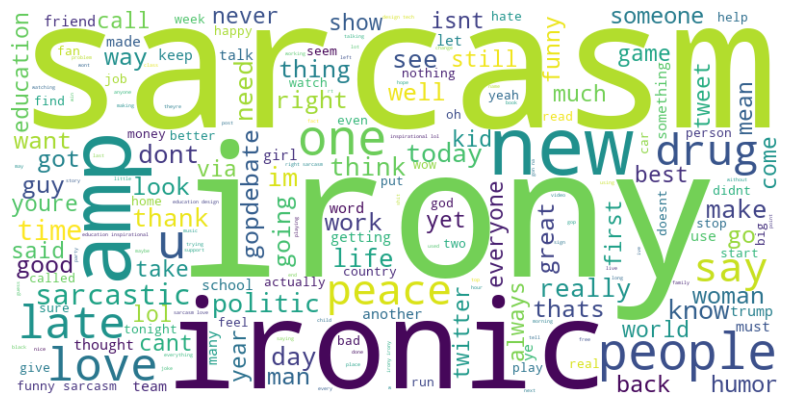

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'lemmatized_data' is your 2D array of lemmatized words
flattened_data = [word for sublist in lemmatized_tweets for word in sublist]

# Join the words into a single string
text = ' '.join(flattened_data)

# Create a WordCloud object with optional parameters for customization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


### 9. Sentiment Analysis

Perform sentiment analysis to classify tweets as positive, negative, or neutral.
Visualize the distribution of sentiment across the dataset.

In [152]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['clean_tweets'].apply(get_subjectivity)
df['Polarity'] = df['clean_tweets'].apply(get_polarity)
df

,tweets,class,tweet_length,emojis,tweet_language,clean_tweets,tokens,Subjectivity,Polarity
0,Be aware dirty step to get money #staylight ...,figurative,108,,en,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",0.616667,-0.083333
1,#sarcasm for #people who don't understand #diy...,figurative,80,,en,sarcasm for people who dont understand diy art...,"[sarcasm, people, dont, understand, diy, artat...",0.000000,0.000000
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,,en,iminworkjeremy medsingle dailymail readers bei...,"[iminworkjeremy, medsingle, dailymail, readers...",0.800000,0.100000
3,@wilw Why do I get the feeling you like games?...,figurative,55,,en,wilw why do i get the feeling you like games s...,"[wilw, get, feeling, like, games, sarcasm]",0.000000,0.000000
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,,en,teacherarthurg rweingarten you probably just m...,"[teacherarthurg, rweingarten, probably, missed...",0.800000,0.100000
...,...,...,...,...,...,...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,111,,en,photo image via we heart it httptcokynfzoi chi...,"[photo, image, via, heart, httptcokynfzoi, chi...",0.825000,0.300000
81404,I never knew..I better put this out to the Uni...,sarcasm,137,,en,i never knewi better put this out to the unive...,"[never, knewi, better, put, universe, lolmaybe...",0.600000,0.650000
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,128,,en,hey just wanted to say thanks puberty for lett...,"[hey, wanted, say, thanks, puberty, letting, a...",0.500000,-0.200000
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,137,,en,im sure coverage like the fox news special the...,"[im, sure, coverage, like, fox, news, special,...",0.597884,0.230159


In [153]:
def getAnalysis(score):
    if score < 0 :
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [154]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,tweets,class,tweet_length,emojis,tweet_language,clean_tweets,tokens,Subjectivity,Polarity,Analysis
0,Be aware dirty step to get money #staylight ...,figurative,108,,en,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",0.616667,-0.083333,negative
1,#sarcasm for #people who don't understand #diy...,figurative,80,,en,sarcasm for people who dont understand diy art...,"[sarcasm, people, dont, understand, diy, artat...",0.000000,0.000000,neutral
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,,en,iminworkjeremy medsingle dailymail readers bei...,"[iminworkjeremy, medsingle, dailymail, readers...",0.800000,0.100000,positive
3,@wilw Why do I get the feeling you like games?...,figurative,55,,en,wilw why do i get the feeling you like games s...,"[wilw, get, feeling, like, games, sarcasm]",0.000000,0.000000,neutral
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,,en,teacherarthurg rweingarten you probably just m...,"[teacherarthurg, rweingarten, probably, missed...",0.800000,0.100000,positive
...,...,...,...,...,...,...,...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,111,,en,photo image via we heart it httptcokynfzoi chi...,"[photo, image, via, heart, httptcokynfzoi, chi...",0.825000,0.300000,positive
81404,I never knew..I better put this out to the Uni...,sarcasm,137,,en,i never knewi better put this out to the unive...,"[never, knewi, better, put, universe, lolmaybe...",0.600000,0.650000,positive
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,128,,en,hey just wanted to say thanks puberty for lett...,"[hey, wanted, say, thanks, puberty, letting, a...",0.500000,-0.200000,negative
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,137,,en,im sure coverage like the fox news special the...,"[im, sure, coverage, like, fox, news, special,...",0.597884,0.230159,positive


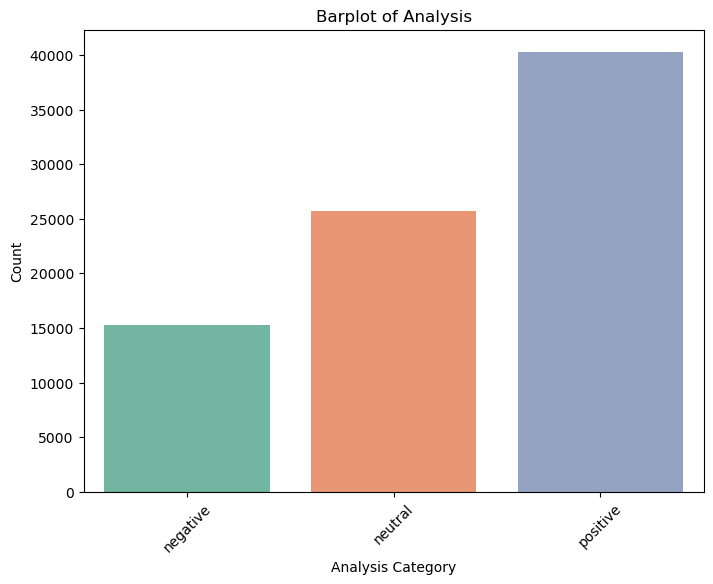

In [155]:
# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Analysis', palette='Set2')

# Customize the plot
plt.title("Barplot of Analysis")
plt.xlabel("Analysis Category")
plt.ylabel("Count")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

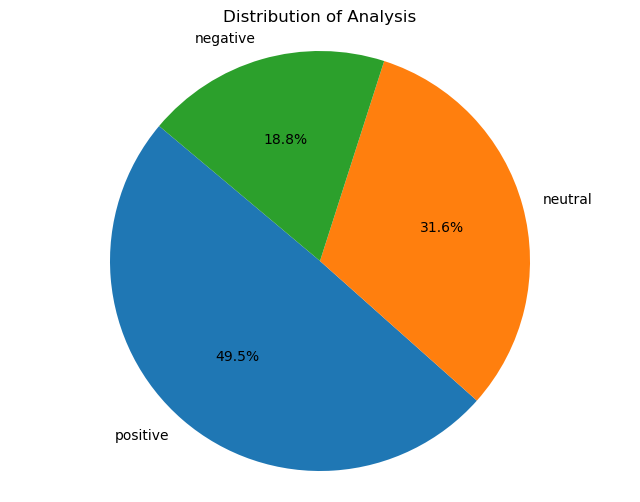

In [156]:
plt.figure(figsize=(8, 6))
plt.pie(df['Analysis'].value_counts(), labels=df['Analysis'].value_counts().index, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title("Distribution of Analysis")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

### 10. Topic Modeling:

Apply topic modeling techniques like Latent Dirichlet Allocation (LDA) to uncover underlying topics within the tweets.
Visualize topic distributions and explore the content of tweets within each topic

In [159]:
dictionary = corpora.Dictionary(lemmatized_tweets)
corpus = [dictionary.doc2bow(text) for text in lemmatized_tweets]

In [163]:
subsample_corpus = corpus[:1000]  # Use a smaller subset of the corpus for initial experiments
lda_model = LdaModel(subsample_corpus, num_topics=5, id2word=dictionary, passes=15)


In [164]:
for topic in lda_model.print_topics():
    print(topic)

(0, '0.003*"sarcasm" + 0.003*"irony" + 0.001*"ironic" + 0.001*"get" + 0.000*"right" + 0.000*"day" + 0.000*"oh" + 0.000*"call" + 0.000*"year" + 0.000*"thats"')
(1, '0.003*"irony" + 0.002*"sarcasm" + 0.001*"im" + 0.000*"one" + 0.000*"like" + 0.000*"want" + 0.000*"know" + 0.000*"amp" + 0.000*"never" + 0.000*"ironic"')
(2, '0.005*"sarcasm" + 0.003*"irony" + 0.001*"people" + 0.001*"work" + 0.001*"get" + 0.000*"know" + 0.000*"ironic" + 0.000*"omg" + 0.000*"make" + 0.000*"im"')
(3, '0.006*"sarcasm" + 0.003*"irony" + 0.001*"ironic" + 0.001*"love" + 0.001*"great" + 0.001*"good" + 0.001*"know" + 0.001*"dont" + 0.001*"youre" + 0.001*"im"')
(4, '0.005*"irony" + 0.004*"sarcasm" + 0.001*"like" + 0.001*"ironic" + 0.000*"time" + 0.000*"still" + 0.000*"really" + 0.000*"see" + 0.000*"want" + 0.000*"way"')


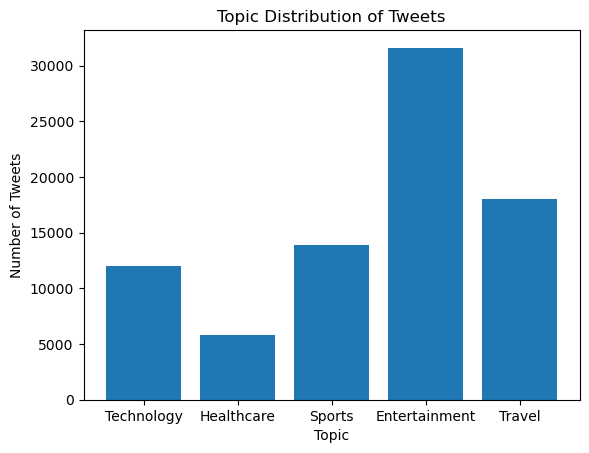

In [166]:
topic_distribution = [lda_model[doc] for doc in corpus]

# Extract the dominant topic for each tweet
dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_distribution]

# Count the number of tweets in each topic
topic_counts = dict((i, dominant_topics.count(i)) for i in range(num_topics))
topic_labels = ["Technology", "Healthcare", "Sports", "Entertainment", "Travel"]

# Create a bar plot
plt.bar(topic_labels, topic_counts.values())
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.title('Topic Distribution of Tweets')
plt.show()

### 11. Part-of-speech (POS) tagging

It involves assigning a specific part-of-speech (such as noun, verb, adjective, adverb, pronoun, etc.) to each word in a text corpus, based on its grammatical role and its context within a sentence. 

In [171]:
df['pos_tags'] = df['clean_tweets'].apply(lambda tweet: nltk.pos_tag(nltk.word_tokenize(tweet)))

In [172]:
df

,tweets,class,tweet_length,emojis,tweet_language,clean_tweets,tokens,Subjectivity,Polarity,Analysis,pos_tags
0,Be aware dirty step to get money #staylight ...,figurative,108,,en,be aware dirty step to get money staylight sta...,"[aware, dirty, step, get, money, staylight, st...",0.616667,-0.083333,negative,"[(be, VB), (aware, JJ), (dirty, JJ), (step, NN..."
1,#sarcasm for #people who don't understand #diy...,figurative,80,,en,sarcasm for people who dont understand diy art...,"[sarcasm, people, dont, understand, diy, artat...",0.000000,0.000000,neutral,"[(sarcasm, NN), (for, IN), (people, NNS), (who..."
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,132,,en,iminworkjeremy medsingle dailymail readers bei...,"[iminworkjeremy, medsingle, dailymail, readers...",0.800000,0.100000,positive,"[(iminworkjeremy, NN), (medsingle, NN), (daily..."
3,@wilw Why do I get the feeling you like games?...,figurative,55,,en,wilw why do i get the feeling you like games s...,"[wilw, get, feeling, like, games, sarcasm]",0.000000,0.000000,neutral,"[(wilw, NN), (why, WRB), (do, VBP), (i, VB), (..."
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,75,,en,teacherarthurg rweingarten you probably just m...,"[teacherarthurg, rweingarten, probably, missed...",0.800000,0.100000,positive,"[(teacherarthurg, NN), (rweingarten, VB), (you..."
...,...,...,...,...,...,...,...,...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,111,,en,photo image via we heart it httptcokynfzoi chi...,"[photo, image, via, heart, httptcokynfzoi, chi...",0.825000,0.300000,positive,"[(photo, NN), (image, NN), (via, IN), (we, PRP..."
81404,I never knew..I better put this out to the Uni...,sarcasm,137,,en,i never knewi better put this out to the unive...,"[never, knewi, better, put, universe, lolmaybe...",0.600000,0.650000,positive,"[(i, NN), (never, RB), (knewi, VBP), (better, ..."
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,128,,en,hey just wanted to say thanks puberty for lett...,"[hey, wanted, say, thanks, puberty, letting, a...",0.500000,-0.200000,negative,"[(hey, NN), (just, RB), (wanted, VBD), (to, TO..."
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,137,,en,im sure coverage like the fox news special the...,"[im, sure, coverage, like, fox, news, special,...",0.597884,0.230159,positive,"[(im, JJ), (sure, JJ), (coverage, NN), (like, ..."


'DT': Determiner


'JJ': Adjective

'NN': Noun

'VBZ': Verb, 3rd person singular present tense

'IN': Preposition

'.': Punctuation



### 12. Class wise Analyis

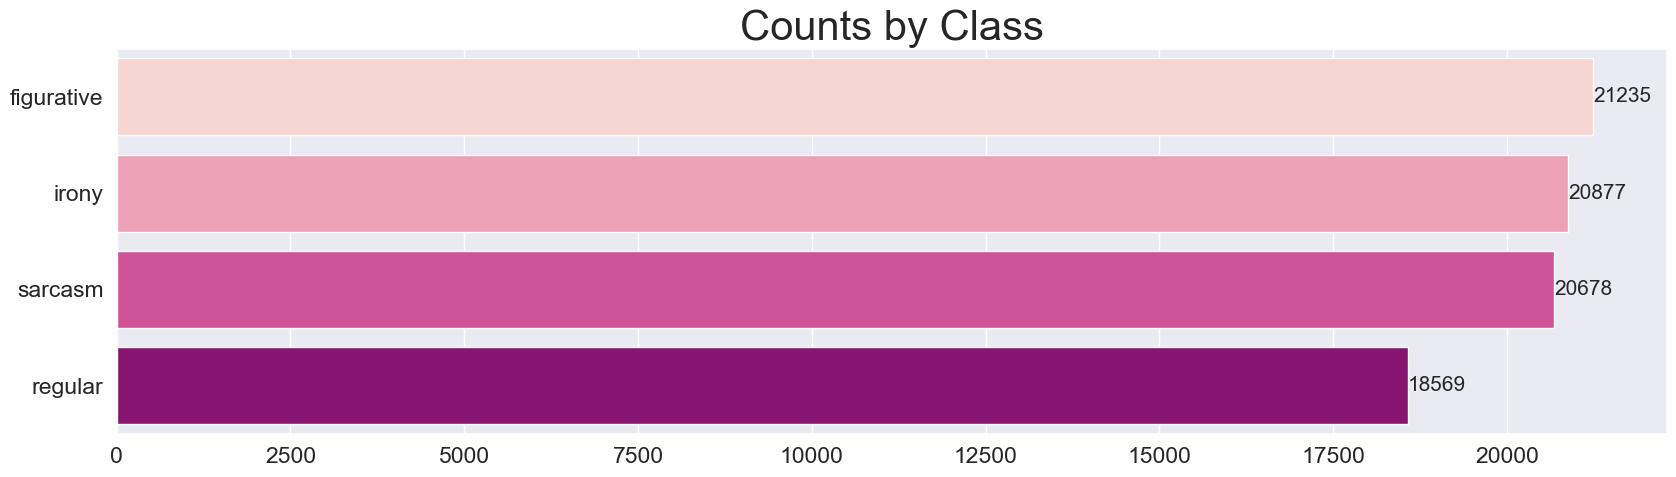

In [173]:
plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df,x=df["class"].value_counts().values,y=df["class"].value_counts().index,palette="RdPu")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Counts by Class",fontsize = 30)
plt.show()

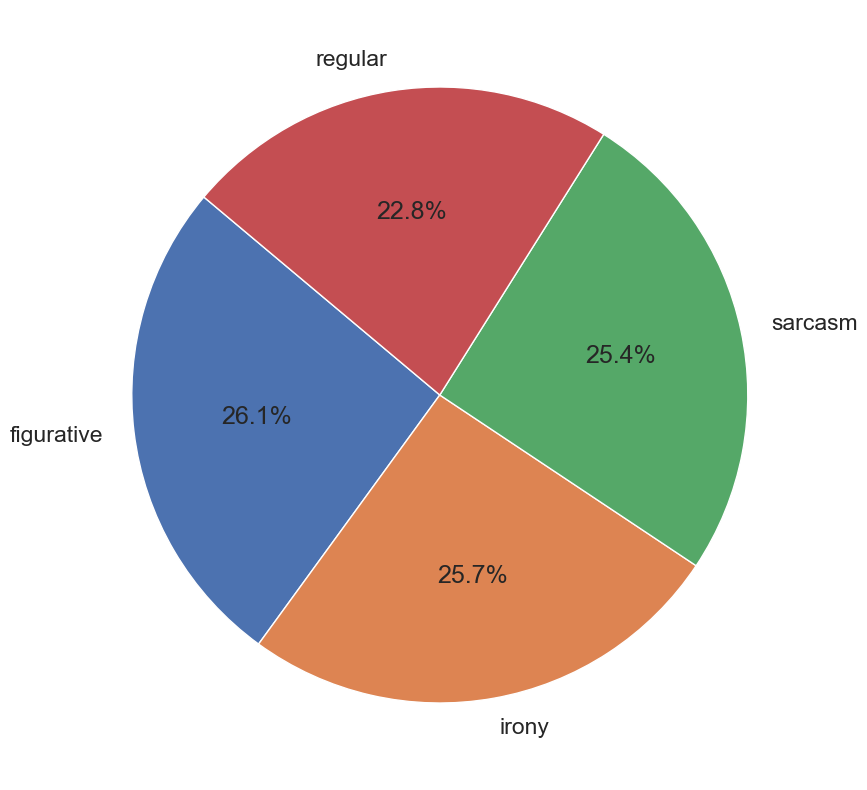

In [174]:
plt.figure(figsize = (20,10))
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.show()

In [27]:
df

,tweets,class,clean_tweets
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money staylight sta...
1,#sarcasm for #people who don't understand #diy...,figurative,sarcasm for people who dont understand diy art...
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,iminworkjeremy medsingle dailymail readers bei...
3,@wilw Why do I get the feeling you like games?...,figurative,wilw why do i get the feeling you like games s...
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,teacherarthurg rweingarten you probably just m...
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,photo image via we heart it httptcokynfzoi chi...
81404,I never knew..I better put this out to the Uni...,sarcasm,i never knewi better put this out to the unive...
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,hey just wanted to say thanks puberty for lett...
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,im sure coverage like the fox news special the...


## Model Building

### 1. Support Vector Machine

In [28]:
X = df['clean_tweets']  
y = df['class'] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Tokenize the text data into a list of words for each tweet
X_train_tokenized = X_train.apply(lambda x: word_tokenize(x.lower()))
X_test_tokenized = X_test.apply(lambda x: word_tokenize(x.lower()))

In [32]:
X_train_tokenized = X_train_tokenized.apply(remove_stopwords)
X_test_tokenized = X_test_tokenized.apply(remove_stopwords)

In [46]:
X_test_tokenized

15728    [arcticwarlocks, mttgcast, find, hilarious, mu...
70232    [tannerstewart, true, gosh, cant, wait, sarcas...
26776     [becky, saying, think, think, think, bb, ironic]
73813    [jared, fogles, dramatic, weight, loss, subway...
20546    [oh, love, customers, throw, money, purchase, ...
                               ...                        
12430    [rightbecause, didnt, eat, enough, tonight, th...
47733    [musicsa, thanks, sharing, music, sa, great, f...
71866    [madeline, youre, definitely, lacking, confide...
24640    [hotel, medx, costs, credit, limit, credit, ca...
4796                    [talk, ironic, httpstcorjqdttmtgv]
Name: clean_tweets, Length: 24408, dtype: object

In [26]:
# Define a function to perform lemmatization on a list of words
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [33]:
X_train_lemmatized = X_train_tokenized.apply(lemmatize_words)
X_test_lemmatized = X_test_tokenized.apply(lemmatize_words)

In [34]:
# Train Word2Vec embeddings on the training data
w2v_model = Word2Vec(X_train_lemmatized, vector_size=100, window=5, min_count=1, sg=0)

In [35]:
w2v_model.save("w2v_lem.model")

In [36]:
w2v_model.epochs

5

In [37]:
w2v_model.wv.most_similar("good")

[('nice', 0.9761186838150024),
 ('well', 0.9758489727973938),
 ('forward', 0.9757394194602966),
 ('wow', 0.9728446006774902),
 ('glad', 0.9715577960014343),
 ('done', 0.9708104133605957),
 ('going', 0.9700432419776917),
 ('goodie', 0.9698631763458252),
 ('great', 0.9696810245513916),
 ('bad', 0.9680135250091553)]

In [38]:
# Transform the tweets into average Word2Vec vectors
def average_word_vectors(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

In [39]:
X_train_w2v = [average_word_vectors(tokens, w2v_model, 100) for tokens in X_train_lemmatized]
X_test_w2v = [average_word_vectors(tokens, w2v_model, 100) for tokens in X_test_lemmatized]

In [40]:
label_encoder = LabelEncoder()

In [41]:
# Encode the class labels in your training and testing data
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [42]:
# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [43]:
# Train the classifier on the Word2Vec transformed training data
svm_classifier.fit(X_train_w2v, y_train_encoded)

SVC(kernel='linear', random_state=42)

In [44]:
y_pred = svm_classifier.predict(X_test_w2v)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7361111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.01      0.03      6313
           1       0.67      0.98      0.80      6409
           2       0.99      1.00      0.99      5507
           3       0.66      0.98      0.79      6179

    accuracy                           0.74     24408
   macro avg       0.67      0.74      0.65     24408
weighted avg       0.65      0.74      0.64     24408



Accuracy: The overall accuracy of the SVM classifier is approximately 74%. This means that it correctly predicts the class labels for 74% of the tweets in the test dataset.

Precision and Recall: The model's precision and recall values vary across different classes. Class '2' (regular) has very high precision, recall, and F1-score, indicating that the model performs exceptionally well for this class. Class '0' (figurative) has the lowest precision and recall, suggesting that the model struggles to correctly classify tweets in this class.

F1-Scores: The F1-scores provide a balance between precision and recall. The highest F1-score is observed for class '2' (regular), while class '0' (figurative) has the lowest F1-score.


### Trying Cross Validation

In [8]:
df

,tweets,class,clean_tweets
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money staylight sta...
1,#sarcasm for #people who don't understand #diy...,figurative,sarcasm for people who dont understand diy art...
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,iminworkjeremy medsingle dailymail readers bei...
3,@wilw Why do I get the feeling you like games?...,figurative,wilw why do i get the feeling you like games s...
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,teacherarthurg rweingarten you probably just m...
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,photo image via we heart it httptcokynfzoi chi...
81404,I never knew..I better put this out to the Uni...,sarcasm,i never knewi better put this out to the unive...
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,hey just wanted to say thanks puberty for lett...
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,im sure coverage like the fox news special the...


In [9]:
X = df['clean_tweets']  
y = df['class'] 

In [11]:
# Tokenize the text data into a list of words for each tweet
X = X.apply(lambda x: word_tokenize(x.lower()))

In [12]:
X = X.apply(remove_stopwords)

In [14]:
# Train Word2Vec embeddings on the training data
w2v_model1 = Word2Vec(X, vector_size=100, window=5, min_count=1, sg=0)

In [15]:
w2v_model1.save("w2vforXdata.model")

In [16]:
# Transform the tweets into average Word2Vec vectors
def average_word_vectors(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

In [17]:
X_w2v_data = [average_word_vectors(tokens, w2v_model1, 100) for tokens in X]

In [18]:
label_encoder = LabelEncoder()

In [20]:
# Encode the class labels in your training and testing data
y = label_encoder.fit_transform(y)

In [22]:
# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [25]:
# Split the data into a training set and a testing set with stratified sampling (50% subset)
X_train, _, y_train, _ = train_test_split(X_w2v_data, y, test_size=0.5, stratify=y, random_state=42)

# Perform cross-validation (5-fold cross-validation in this example)
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores on 50% Subset:", cross_val_scores)
print("Mean Accuracy on 50% Subset:", cross_val_scores.mean())


Cross-Validation Scores on 50% Subset: [0.73893805 0.73721731 0.73758604 0.7383235  0.73779963]
Mean Accuracy on 50% Subset: 0.7379729055956545


### 2. Decision Tree

In [22]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [23]:
# Train the classifier on the Word2Vec transformed training data
dt_classifier.fit(X_train_w2v, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [24]:
# Make predictions on the Word2Vec transformed testing data
y_pred = dt_classifier.predict(X_test_w2v)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.4079400196656834
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.21      0.18      6313
           1       0.35      0.29      0.32      6409
           2       0.84      0.80      0.82      5507
           3       0.43      0.39      0.41      6179

    accuracy                           0.41     24408
   macro avg       0.45      0.42      0.43     24408
weighted avg       0.43      0.41      0.42     24408



Accuracy: The overall accuracy of the Decision Tree classifier is approximately 41%. This means that it correctly predicts the class labels for 41% of the tweets in the test dataset.<br>

Precision and Recall: The model's precision and recall values vary across different classes. Class '2' (regular) has the highest precision, recall, and F1-score, indicating that the model performs very well for this class. Class '0' (figurative) and class '1' (irony) have lower precision, recall, and F1-scores, indicating that the model struggles to correctly classify tweets in these classes.<br>

F1-Scores: The F1-scores provide a balance between precision and recall. The highest F1-score is observed for class '2' (regular), while classes '0' (figurative) and '1' (irony) have lower F1-scores.

### 3. Random Forest

In [26]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
# Train the classifier on the Word2Vec transformed training data
rf_classifier.fit(X_train_w2v, y_train_encoded)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the Word2Vec transformed testing data
y_pred = rf_classifier.predict(X_test_w2v)

In [29]:
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5303588987217306
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.05      0.06      6313
           1       0.50      0.55      0.52      6409
           2       0.92      0.91      0.92      5507
           3       0.54      0.66      0.59      6179

    accuracy                           0.53     24408
   macro avg       0.51      0.54      0.52     24408
weighted avg       0.49      0.53      0.51     24408



Accuracy: The overall accuracy of the Random Forest classifier is approximately 53%. This means that it correctly predicts the class labels for 53% of the tweets in the test dataset.<br>

Precision and Recall: The model's precision and recall values vary across different classes. Class '2' (regular) has the highest precision, recall, and F1-score, indicating that the model performs very well for this class. Class '0' (figurative) has the lowest precision, recall, and F1-score, indicating that the model struggles to correctly classify tweets in this class.<br>

F1-Scores: The F1-scores provide a balance between precision and recall. The highest F1-score is observed for class '2' (regular), while class '0' (figurative) has the lowest F1-score.

### 4. Gradient Boosting - XGBoost

In [30]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

In [31]:
# Train the classifier on the Word2Vec transformed training data
xgb_classifier.fit(X_train_w2v, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [32]:
# Make predictions on the Word2Vec transformed testing data
y_pred = xgb_classifier.predict(X_test_w2v)

In [33]:
# Encode the class labels in your testing data (y_test)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5977548344804982
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.10      0.12      6313
           1       0.58      0.67      0.62      6409
           2       0.96      0.96      0.96      5507
           3       0.60      0.71      0.65      6179

    accuracy                           0.60     24408
   macro avg       0.57      0.61      0.59     24408
weighted avg       0.56      0.60      0.57     24408



Accuracy: The overall accuracy of the Gradient Boosting classifier is approximately 60%. This means that it correctly predicts the class labels for 60% of the tweets in the test dataset.

Precision and Recall: The model's precision and recall values vary across different classes. Class '2' (regular) has the highest precision, recall, and F1-score, indicating that the model performs very well for this class. Class '0' (figurative) has the lowest precision, recall, and F1-score, indicating that the model struggles to correctly classify tweets in this class.

F1-Scores: The F1-scores provide a balance between precision and recall. The highest F1-score is observed for class '2' (regular), while class '0' (figurative) has the lowest F1-score.

In [42]:
data = [
    {'Sr. No': 1, 'Model': 'Support Vector Machine', 'Accuracy': "74%"},
    {'Sr. No': 2, 'Model': 'Decision Tree', 'Accuracy': "41%"},
    {'Sr. No': 3, 'Model': 'Random Forest', 'Accuracy': "53%"},
    {'Sr. No': 4, 'Model': 'Gradient Boosting - XGBoost', 'Accuracy': "60%"}
    # Add more rows as needed
]

In [46]:
Model_Accuracy_Table = pd.DataFrame(data)
Model_Accuracy_Table.set_index("Sr. No")

,Model,Accuracy
Sr. No,,
1,Support Vector Machine,74%
2,Decision Tree,41%
3,Random Forest,53%
4,Gradient Boosting - XGBoost,60%


In [30]:
import joblib

# Your trained machine learning model
model = svm_classifier  # Replace with your actual model

# Save the model to a file
joblib.dump(model, 'SVM.joblib')

['SVM.joblib']

In [31]:
import streamlit as st
import joblib  # Or use `import pickle` if you used pickle

# Load the pre-trained model
model = joblib.load('your_model.joblib')  # Replace with your model's filename

# Now, you can use the loaded model for predictions